## Multi Layer Perceptron MNIST

In [1]:
from mnist import MNIST
import random
import numpy as np
import matplotlib.pyplot as plt
mndata = MNIST('samples')

def convert_all_label(Labels):
    l = len(Labels)
    target = np.zeros((10,l),dtype=float)
    for i in range(l):
        m = Labels[i]
        target[m,i] = 1.
    return target
def convert_a_label(value):
    target = np.zeros((10,1),dtype=float)
    target[value]=1.
    return target
def softmax(V):
    # tru cho np.max de chống tràn số khi số mũ quá lớn
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

In [175]:
images_train, labels_train = mndata.load_training()
images_test, labels_test = mndata.load_testing()

60000


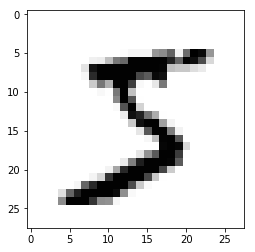

In [176]:
plt.imshow(np.reshape(images_train[0],(28,28)),cmap='Greys')
convert_a_label(labels_train[0])
print(len(images_train))

In [294]:
n_input = 784
n_output = 10
n_hidden_1 = 256
n_hidden_2 = 256

training_epochs = 15
batch_size = 50     #100
learning_rate = 0.01
N = len(images_train)
total_batch = int(N/batch_size) # per loop

weights = {
    'w1':0.01*np.random.randn(n_input,n_hidden_1),
    'w2':0.01*np.random.randn(n_hidden_1,n_hidden_2),
    'out':0.01*np.random.randn(n_hidden_2,n_output)
}
biases = {

    'b1':np.zeros((n_hidden_1,1)),
    'b2':np.zeros((n_hidden_2,1)),
    'out':np.zeros((n_output,1))
}


### Training mini-BGD

In [295]:


for it in range(training_epochs):
    rd_id = np.random.permutation(N)
    for i in range(total_batch):
        #get batch (100 element random )
        X = [images_train[j] for j in rd_id[i*batch_size:(i+1)*batch_size]] #batch_size*784
        Y = [labels_train[j] for j in rd_id[i*batch_size:(i+1)*batch_size]] #batch_size*1
        Y = convert_all_label(Y) #10*100
        
        X = np.asarray(X) #batch_size*n_input
        Y = np.asarray(Y) #n_output*batch_size
        
        #caculator L1 L2 L_out
        Z1 = np.dot(weights['w1'].T,X.T)+biases['b1']         # n_hidden_1*batch_size
        Layer_1 = np.maximum(Z1,0)                            # n_hidden_1*batch_size
        Z2 = np.dot(weights['w2'].T,Layer_1)+biases['b2']     # n_hidden_2*batch_size
        Layer_2 = np.maximum(Z2,0)                            # n_hidden_2*batch_size
        Zout = np.dot(weights['out'].T,Layer_2)+biases['out'] # n_output*batch_size 
        Yhat = softmax(Zout)                                  # n_output*batch_size
        
        #  backpropagation
        E_out = (Yhat-Y)/batch_size                           # n_output*batch_size
        dW_out = np.dot(Layer_2,E_out.T)                      # n_hiddent_2*output
        db_out = np.sum(E_out, axis = 1, keepdims = True)     #
        
        E_2 = np.dot(weights['out'],E_out)                     # n_hiden_2*batch_size
        E_2[Layer_2<=0] = 0 # gradient of ReLU
        dW_2 = np.dot(Layer_1,E_2.T)
        db_2 = np.sum(E_2, axis = 1, keepdims = True)
        
        E_1 = np.dot(weights['w2'],E_2)                     # n_hiden_1*batch_size
        E_1[Layer_1<=0] = 0                                 # gradient of ReLU
        dW_1 = np.dot(X.T,E_1.T)                            # n_input*n_hidden_1
        db_1 = np.sum(E_1, axis = 1, keepdims = True)       # n_hidden_1
        
        #update weights and bias
        weights['out'] += -learning_rate*dW_out
        weights['w2'] += -learning_rate*dW_2
        weights['w1'] += -learning_rate*dW_1
        biases['out'] += -learning_rate*db_out
        biases['b2'] += -learning_rate*db_2
        biases['b1'] += -learning_rate*db_1
        
        

### Model Evaluation

In [291]:
images_test, labels_test = mndata.load_testing()
#labels_test = np.reshape(labels_test,(10000,1))
images_test = np.asarray(images_test)
#labels_test = np.asarray(labels_test)

In [299]:
def testing_sigle_value(temp):
    temp = np.asarray(temp)
    np.reshape(temp,(784,1))
    Z1_temp = np.dot(weights['w1'].T,temp)+biases['b1']#256*784
    Layer1_temp = np.maximum(Z1_temp,0)
    Z2_temp = np.dot(weights['w2'].T,Layer1_temp)+biases['b2']#256*1
    Layer2_temp = np.maximum(Z2_temp,0)
    Zout_temp = np.dot(weights['out'].T,Layer2_temp)+biases['out'] #10*1
    predict_class = np.argmax(Zout_temp,axis=1)
    return Zout_temp

#print(images_test[0])
#print(labels_test.shape)
it = 14
k = np.asarray(images_test[it])
t = testing_sigle_value(np.reshape(k,(784,1)))
print(np.argmax(t,axis=0))
print(labels_test[it])
#labels_test[0]
#labels_test[1]

[1]
1


In [302]:
Z1_temp = np.dot(weights['w1'].T,images_test.T)+biases['b1']
Layer1_temp = np.maximum(Z1_temp,0)
Z2_temp = np.dot(weights['w2'].T,Layer1_temp)+biases['b2']
Layer2_temp = np.maximum(Z2_temp,0)
Zout_temp = np.dot(weights['out'].T,Layer2_temp)+biases['out']
predict_class = np.argmax(Zout_temp,axis=0)
acc = (100*np.mean(predict_class==labels_test))
print('precdic correct  %.2f %%' % acc )


precdic correct  98.63 %


In [305]:
import pickle
data = {'weights':weights,'biases':biases}
pickle_write = open("data.pkl","wb")
pickle.dump(data,pickle_write)
pickle_write.close()

In [13]:
a = np.array([9, 4, 4, 3, 3, 9, 0, 4, 6, 0])
ind = np.argpartition(a, -2)[-2:]
ind[1]

0